
-Profesora: María Auxiliadora Mora. Tecnológico de Costa Rica 

# Introducción

El objetivo del presente documento es implementar un ejemplo básico de exploración de datos.


# Datos:

### Melbourne Housing 

Los datos que utiliza el ejemplo están disponibles en Kaggle.com. Una descripción completa del conjunto de datos está disponible en https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

Descripción de la estructura de datos:

- Rooms: Number of rooms

- **Price**: Price in dollars

- Suburb: Region

- Address: Exact address

- Rooms: Number of rooms 

- Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

- Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

- SellerG: Real Estate Agent

- Date: Date sold

- Distance: Distance from CBD

- Postcode

- Car: Number of carspots

- Bedroom2: Scraped # of Bedrooms (from different source) 

- Bathroom: Number of Bathrooms

- Landsize: Land Size

- BuildingArea: Building Size

- CouncilArea: Governing council for the area

- Lattitude 

- Longtitude  



# Índice

- Carga de datos
- Exploración de los datos


In [1]:
# Bibliotecas requeridas para el ejercicio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch as torch

# Gráficas estadísticas
import seaborn as sns

In [2]:
#Carga de los datos de costos de viviendas en Melbourne.

df = pd.read_csv(r'C:\Users\gguevara\OneDrive - Universidad EARTH\Curso de Programación\materiales\Tema 2\melb_data.csv')

print(df)



              Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      3    h  1031000.0     SP   
13577   Williamstown       83 Power St      3    h  1170000.0      S   
13578   Williamstown      96 Verdon St      4    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      4    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0        Biggin   3/12/2016       2.5    3067.0  ...  

In [3]:
# Columnas que contiene el dataframe
df.columns


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

## Distribución y correlación de los datos

El diagrama de dispersión permite estudiar las relaciones entre dos variables. 

Las relaciones entre los conjuntos de datos se infieren a partir de la forma de las nubes.

- Una relación positiva entre x y y significa que los valores crecientes de x están asociados con los valores crecientes de y.
- Una relación negativa significa que los valores crecientes de x están asociados con los valores decrecientes de y. 

Para los datos del Melbourne Housing la variable dependiente o el target en este caso es el precio.


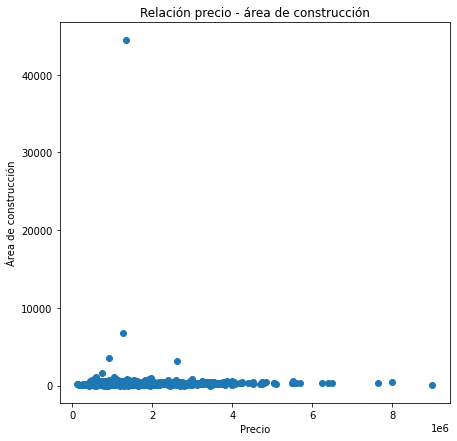

In [4]:
# distribución del precio y el área de construcción.
# Observe los datos atípicos

def plot_data(df, col_x, col_y, label_x, label_y, val_title):
    # Imprime gráfica de dispersión. 
    
    plt.figure(figsize=(7,7))
    plt.scatter(x=df[col_x],y=df[col_y])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(val_title)
    plt.show()
    
plot_data(df,'Price', 'BuildingArea', 'Precio','Área de construcción',
          'Relación precio - área de construcción')    



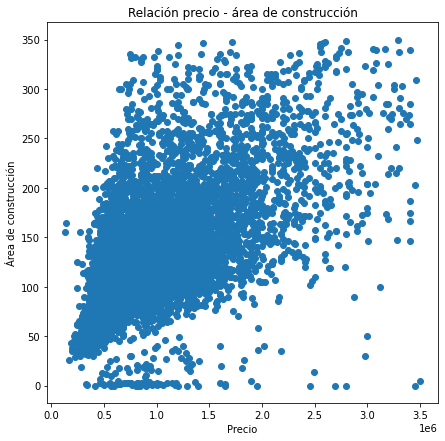

In [5]:
# Podemos eliminar filas de datos atípicos

df=df[df.BuildingArea <= 350]


df=df[df.Price <= 3500000 ]


plot_data(df,'Price', 'BuildingArea', 'Precio','Área de construcción',
          'Relación precio - área de construcción')  



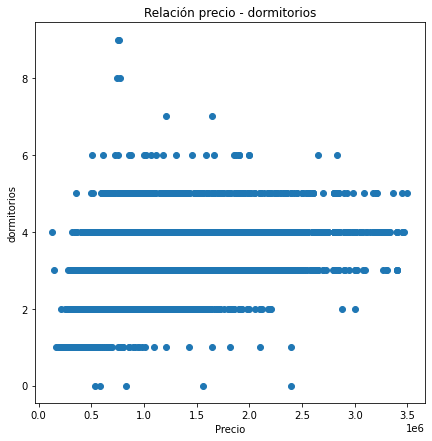

In [6]:
# Relación precio y cantidad de dormitorios.

plot_data(df,'Price', 'Bedroom2', 'Precio','dormitorios', 'Relación precio - dormitorios')    

In [7]:
# Estadísticas de los datos 
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6900.00,6900.00,6900.00,6900.00,6900.00,6900.00,6871.00,6900.00,6900.00,6667.00,6900.00,6900.00,6900.00
mean,2.94,1029665.15,10.12,3103.52,2.91,1.56,1.58,475.32,134.33,1964.04,-37.81,144.99,7427.21
std,0.94,560165.40,6.01,90.92,0.94,0.67,0.92,911.68,62.39,37.71,0.08,0.10,4356.00
min,1.00,131000.00,0.00,3000.00,0.00,1.00,0.00,0.00,0.00,1196.00,-38.16,144.54,389.00
25%,2.00,625000.00,6.10,3043.00,2.00,1.00,1.00,159.00,92.00,1940.00,-37.86,144.92,4380.00
50%,3.00,880000.00,9.20,3081.00,3.00,1.00,2.00,382.50,123.35,1970.00,-37.80,145.00,6543.00
75%,4.00,1300000.00,13.00,3147.25,3.00,2.00,2.00,627.00,167.00,1999.00,-37.76,145.05,10175.00
max,8.00,3500000.00,47.40,3977.00,9.00,8.00,10.00,37000.00,350.00,2018.00,-37.41,145.53,21650.00


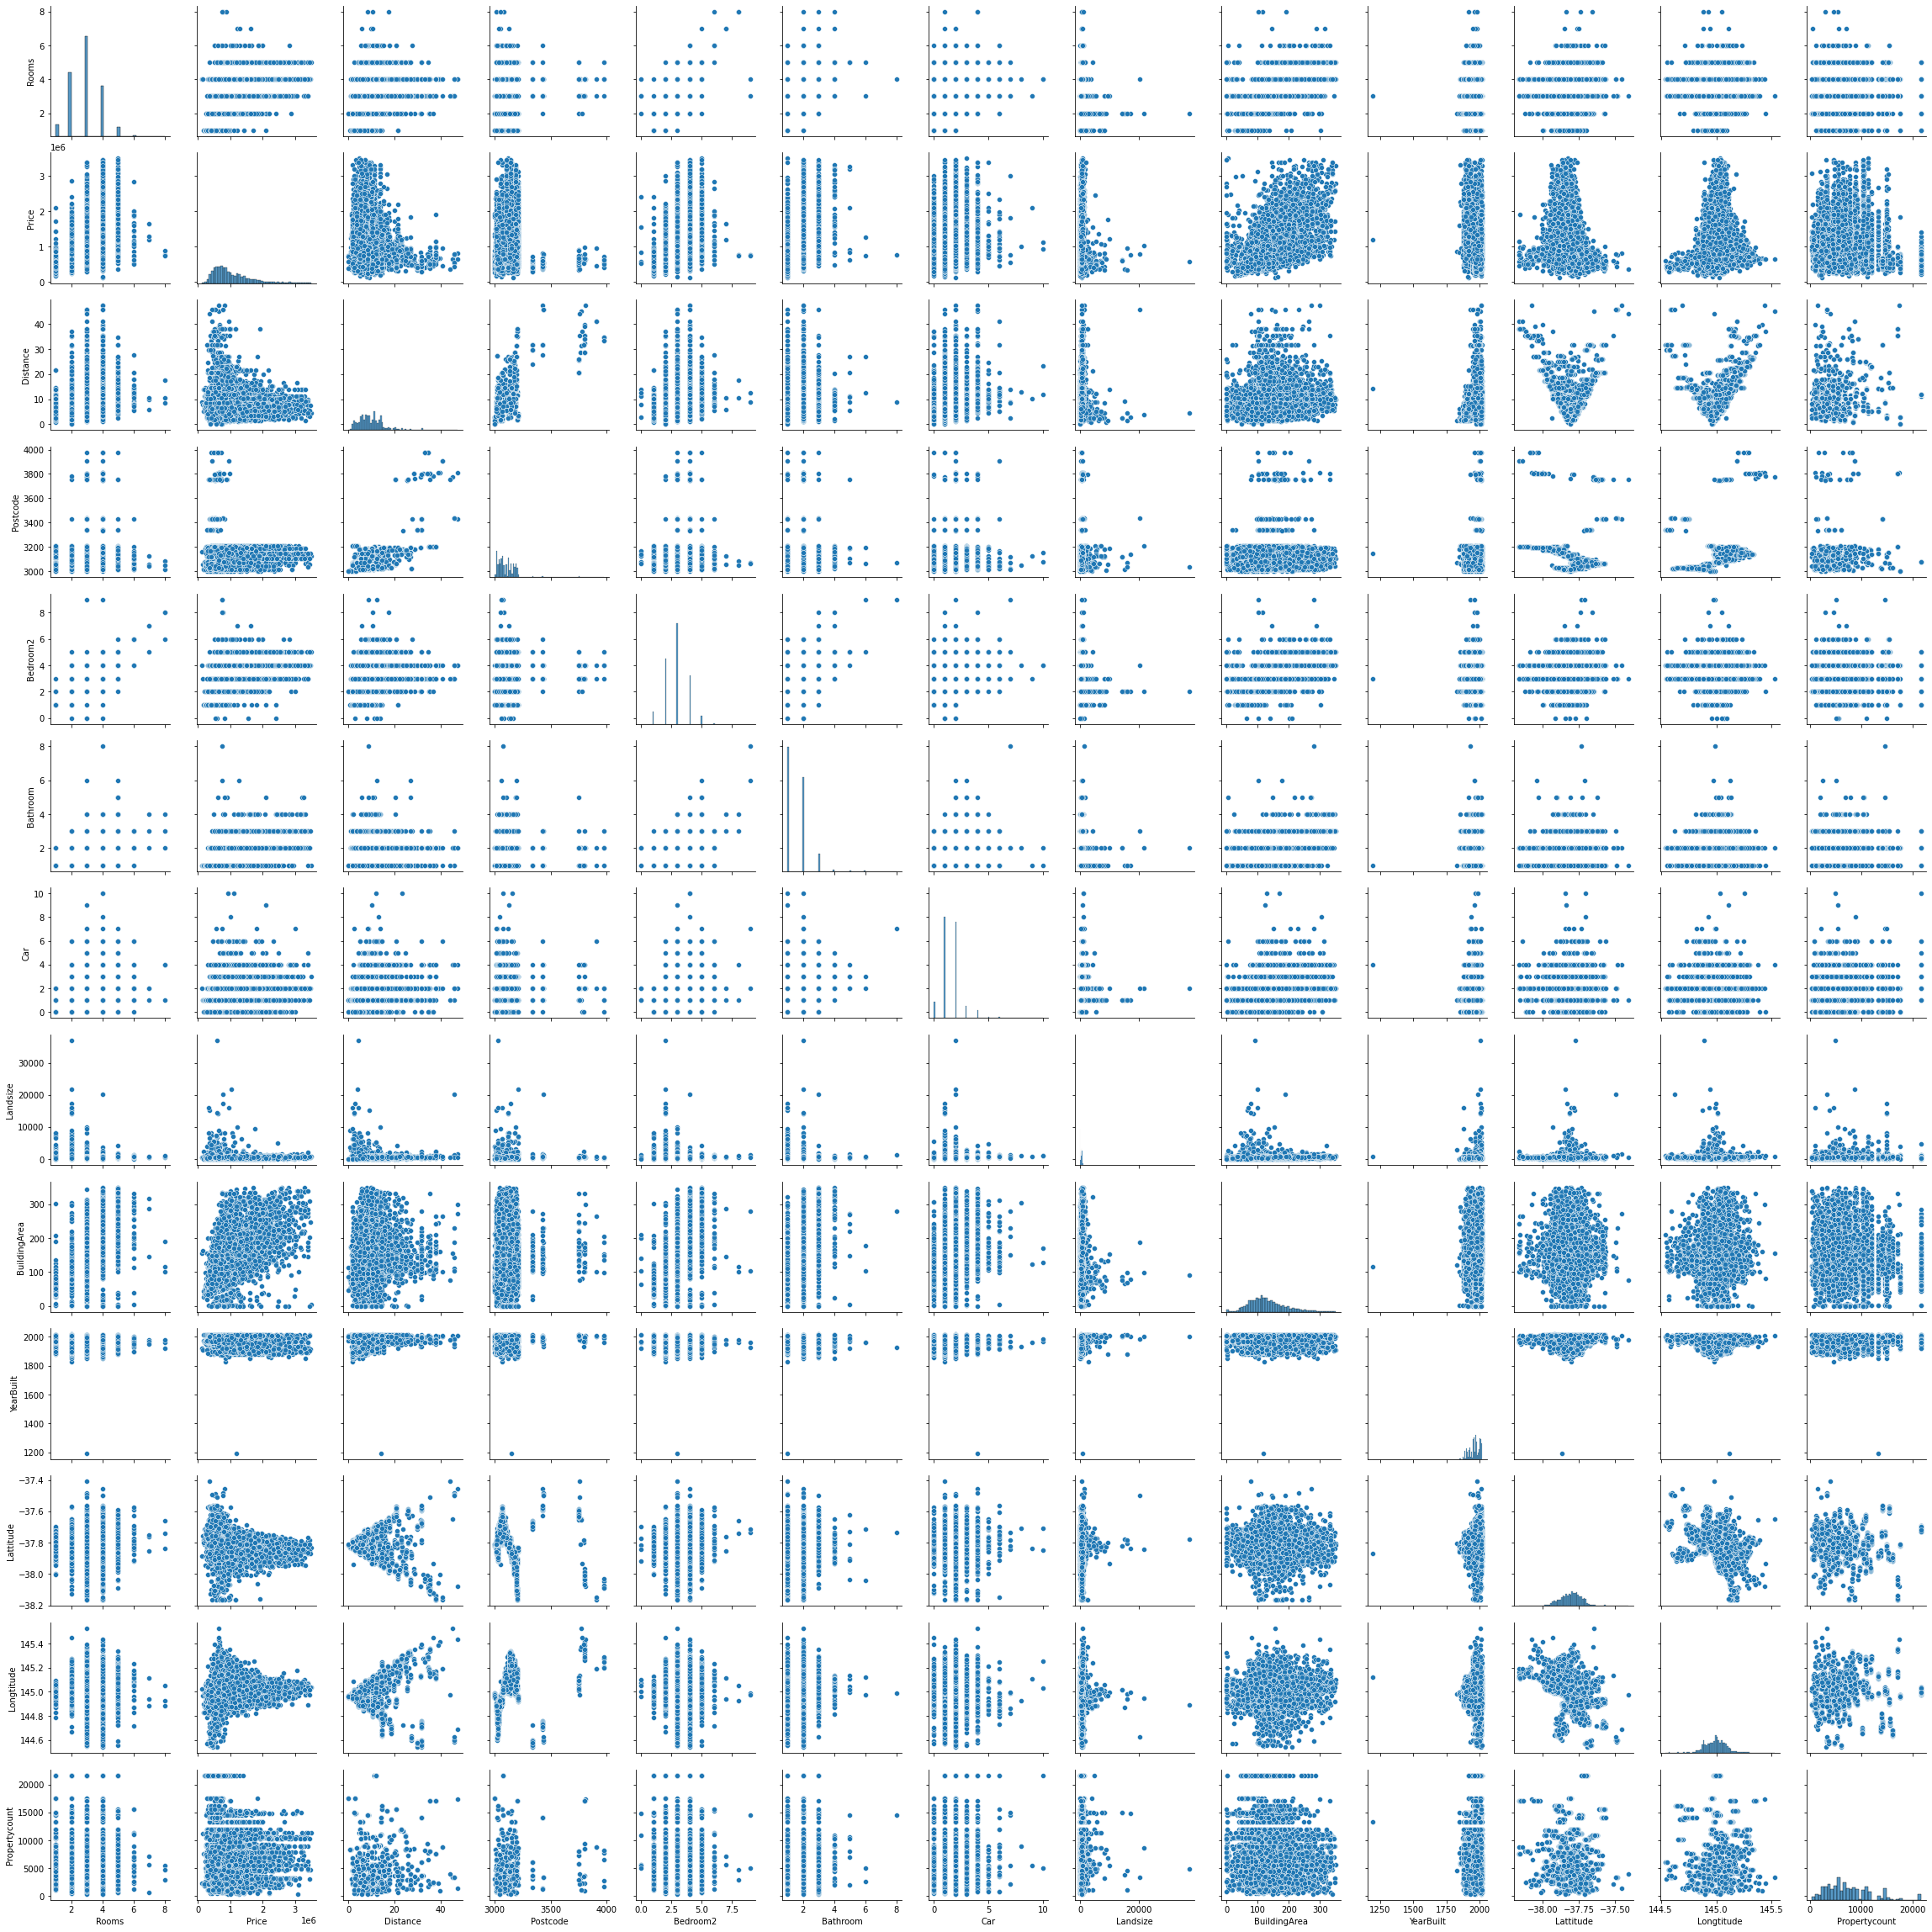

In [8]:
# La siguiente gráfica presenta la relación entre pares de variables. 

# En la diagonal se ven los histogramas de cada variable
# La segunda fila presenta la relación entre la variable precio y todas las demás

sns.pairplot(df);

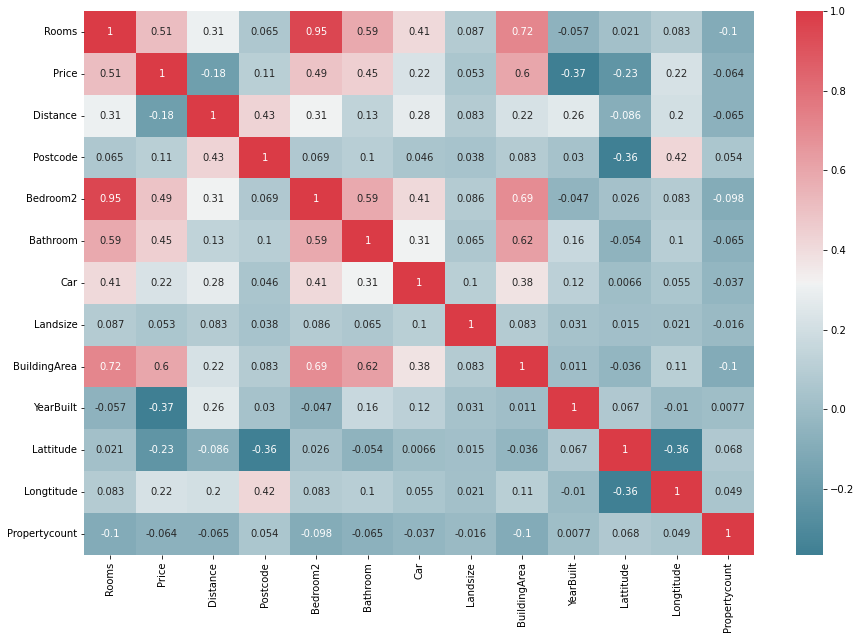

In [9]:
# Matriz de correlación de los datos 
# Otra forma de evaluar qué tan correlacionados están los datos es utilizando 
# un mapa de calor.

# Un mapa de calor es una representación gráfica bidimensional de datos, donde los valores 
# individuales que están contenidos en una matriz se representan como colores.

# Por ejemplo, la entrada Bedroom2, Rooms tiene una valor cercano a 1 lo que significa que
# las variables están muy correlacionadas, si se quisiera disminuir la dimensionalidad del 
# ejercicio alguna de ellas sería candidata a analizar si es factible sacarla del ejecicio,
# porque el aporte de ambas podría ser similar.
# Si analizamos la fila Price (que es el valor a predecir) podemos ver que la variable que 
# más aporta al análsis es BildingArea.


def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(df)

In [10]:
# Preparación de los datos de las columnas que vamos a involucrar en el análisis

# Borrar los registros con valores nulos 
df = df[pd.notnull(df['Rooms'])]
df = df[pd.notnull(df['Price'])]
df = df[pd.notnull(df['Bedroom2'])]
df = df[pd.notnull(df['Bathroom'])]
df = df[pd.notnull(df['Car'])]
df = df[pd.notnull(df['Landsize'])]
df = df[pd.notnull(df['YearBuilt'])]
df = df[pd.notnull(df['Distance'])]


# Borrar registros con valores 0 en columnas donde no 
# tiene sentido.
df= df[df['Rooms'] != 0]
df= df[df['Price'] != 0]
df= df[df['Bedroom2'] != 0]
df= df[df['Bathroom'] != 0]
df= df[df['Landsize'] != 0]
df= df[df['YearBuilt'] != 0]

# Columnas disponibles
#['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
#       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
#       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
#       'Longtitude'],

# Selección de las columnas a utilizar
features=['Rooms', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Distance' ]

# Separación de los atributos y el valor esperado.
print(features)

x_features = df[features]
y_targets = df['Price']
print(x_features)
print(y_targets)

['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Distance']
       Rooms  Bedroom2  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
1          2      2.00      1.00 0.00    156.00         79.00    1900.00   
2          3      3.00      2.00 0.00    134.00        150.00    1900.00   
4          4      3.00      1.00 2.00    120.00        142.00    2014.00   
6          3      4.00      2.00 0.00    245.00        210.00    1910.00   
7          2      2.00      1.00 2.00    256.00        107.00    1890.00   
...      ...       ...       ...  ...       ...           ...        ...   
13572      2      2.00      1.00 1.00    210.00         79.00    2006.00   
13573      4      4.00      2.00 1.00    662.00        172.00    1980.00   
13576      3      3.00      2.00 2.00    333.00        133.00    1995.00   
13578      4      4.00      1.00 5.00    866.00        157.00    1920.00   
13579      4      4.00      1.00 1.00    362.00        112.00    1920.

In [11]:
# Convertir a tensor de Pytorch
print(x_features.columns)

test=torch.tensor(x_features.values) 

print(test)

Index(['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'YearBuilt', 'Distance'],
      dtype='object')
tensor([[2.0000e+00, 2.0000e+00, 1.0000e+00,  ..., 7.9000e+01, 1.9000e+03,
         2.5000e+00],
        [3.0000e+00, 3.0000e+00, 2.0000e+00,  ..., 1.5000e+02, 1.9000e+03,
         2.5000e+00],
        [4.0000e+00, 3.0000e+00, 1.0000e+00,  ..., 1.4200e+02, 2.0140e+03,
         2.5000e+00],
        ...,
        [3.0000e+00, 3.0000e+00, 2.0000e+00,  ..., 1.3300e+02, 1.9950e+03,
         6.8000e+00],
        [4.0000e+00, 4.0000e+00, 1.0000e+00,  ..., 1.5700e+02, 1.9200e+03,
         6.8000e+00],
        [4.0000e+00, 4.0000e+00, 1.0000e+00,  ..., 1.1200e+02, 1.9200e+03,
         6.3000e+00]], dtype=torch.float64)


In [12]:
# Estadísticas de los datos 
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,5622.00,5622.00,5622.00,5622.00,5622.00,5622.00,5622.00,5622.00,5622.00,5622.00,5622.00,5622.00,5622.00
mean,3.11,1102412.83,10.81,3103.08,3.08,1.61,1.66,565.39,144.66,1961.76,-37.80,144.99,7262.52
std,0.87,563128.55,6.11,94.00,0.87,0.68,0.96,974.26,60.50,38.40,0.08,0.11,4371.30
min,1.00,131000.00,0.00,3000.00,1.00,1.00,0.00,1.00,0.00,1196.00,-38.16,144.54,389.00
25%,3.00,698250.00,6.70,3043.00,3.00,1.00,1.00,254.00,104.00,1935.00,-37.86,144.92,4019.00
50%,3.00,950000.00,10.15,3081.00,3.00,2.00,2.00,494.00,132.00,1965.00,-37.80,145.00,6482.00
75%,4.00,1375000.00,13.50,3147.00,4.00,2.00,2.00,658.00,177.00,1996.00,-37.75,145.06,9264.00
max,8.00,3470000.00,47.40,3977.00,9.00,8.00,10.00,37000.00,350.00,2018.00,-37.41,145.53,21650.00


In [13]:
print(df.dtypes)

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object


In [ ]:
i